Ideas adopted from Ch.7 https://www.amazon.com.be/-/en/Marcos-M-L%C3%B3pez-Prado/dp/1108792898

10.00000000000001


<Axes: >

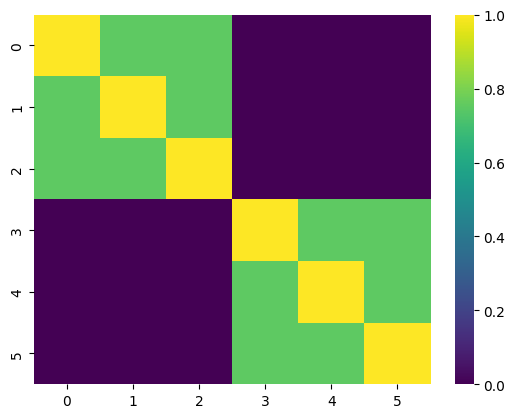

In [89]:
import matplotlib.pyplot as mpl,seaborn as sns
import numpy as np
from scipy.linalg import block_diag


def formBlockMatrix(nBlocks, bSize, bCorr):
    block = np.ones( (bSize, bSize))*bCorr
    block[range(bSize), range(bSize)] = 1 #diagonal is 1
    corr = block_diag(*([block]*nBlocks))
    return corr

corr0=formBlockMatrix(2,3, bCorr=.75)
eVal,eVec=np.linalg.eigh(corr0)
print(
    max(eVal)/min(eVal)
)
sns.heatmap(corr0,cmap='viridis')

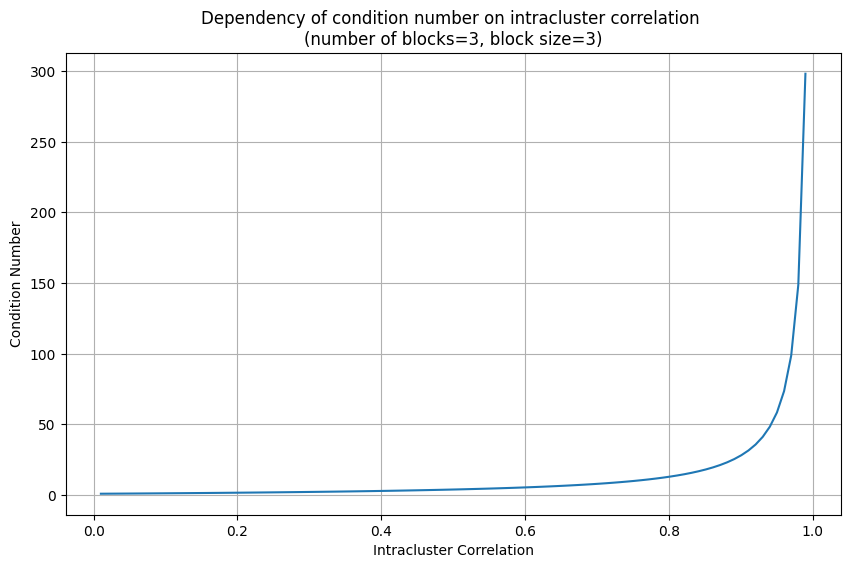

In [93]:
from matplotlib import pyplot as plt

nBlocks, bSize = 3, 3
bCorr_values = np.linspace(.01, .99, 100)  # Sampling 100 values between 0 and 1 for bCorr
condition_numbers = []

# Calculating condition numbers for each bCorr value
for bCorr in bCorr_values:
    corr_matrix = formBlockMatrix(nBlocks, bSize, bCorr)
    eVal, eVec = np.linalg.eigh(corr_matrix)
    condition_number = max(eVal) / min(eVal)
    condition_numbers.append(condition_number)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(bCorr_values, condition_numbers, label='Condition Number')
plt.xlabel('Intracluster Correlation')
plt.ylabel('Condition Number')
plt.title('Dependency of condition number on intracluster correlation \n(number of blocks=3, block size=3)')
plt.grid(True)
plt.show()

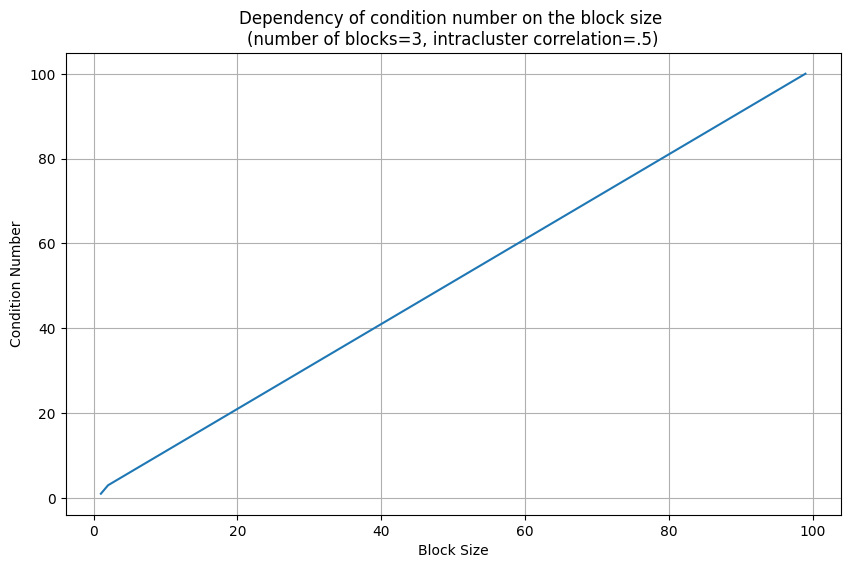

In [94]:
nBlocks, bCorr = 3, .5
bSizes = list(range(1, 100))  # Sampling 100 values between 0 and 1 for bCorr
condition_numbers = []

# Calculating condition numbers for each bCorr value
for bSize in bSizes:
    corr_matrix = formBlockMatrix(nBlocks, bSize, bCorr)
    eVal, eVec = np.linalg.eigh(corr_matrix)
    condition_number = max(eVal) / min(eVal)
    condition_numbers.append(condition_number)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(bSizes, condition_numbers, label='Condition Number')
plt.xlabel('Block Size')
plt.ylabel('Condition Number')
plt.title('Dependency of condition number on the block size \n(number of blocks=3, intracluster correlation=.5)')
plt.grid(True)
plt.show()

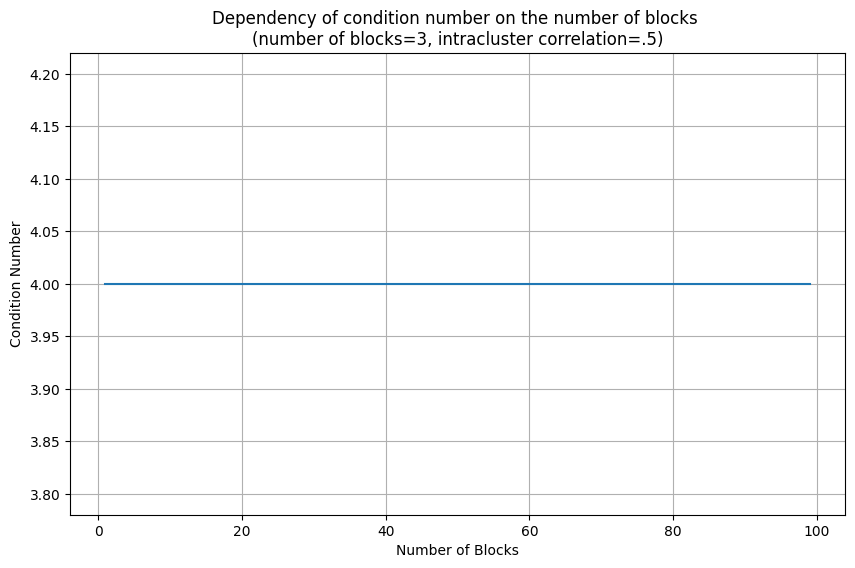

In [95]:
bSize, bCorr = 3, .5
nBlockss = list(range(1, 100))  # Sampling 100 values between 0 and 1 for bCorr
condition_numbers = []

# Calculating condition numbers for each bCorr value
for nBlocks in nBlockss:
    corr_matrix = formBlockMatrix(nBlocks, bSize, bCorr)
    eVal, eVec = np.linalg.eigh(corr_matrix)
    condition_number = max(eVal) / min(eVal)
    condition_numbers.append(condition_number)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(nBlockss, condition_numbers, label='Condition Number')
plt.xlabel('Number of Blocks')
plt.ylabel('Condition Number')
plt.title('Dependency of condition number on the number of blocks \n(number of blocks=3, intracluster correlation=.5)')
plt.grid(True)
plt.show()

# The effect of condition number on the optimization result

## Condition number = 199

ValueError: Unrecognized marker style '-'

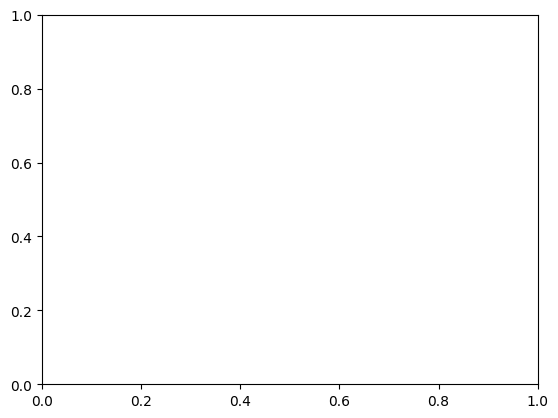

In [84]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import block_diag

# Function to create block covariance matrices
def formBlockMatrix(nBlocks, bSize, bCorr):
    block = np.ones((bSize, bSize)) * bCorr
    np.fill_diagonal(block, 1)  # Ensure diagonal is 1
    corr = block_diag(*([block] * nBlocks))
    return corr

# Optimization problem solver function
def solve_optimization(Cov):
    n = Cov.shape[0]
    Cov_symmetric = (Cov + Cov.T) / 2
    w = cp.Variable(n)
    objective = cp.Minimize(cp.quad_form(w, Cov_symmetric))
    constraints = [cp.sum(w) == 1, w >= -1, w <= 1]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    return w.value

np.random.seed(0)
nBlocks = 3
bSize = 3
bCorrs =[0.1, 0.5, 0.75, 0.9]  # Block correlations
num_scenarios = 200

# For plotting
fig, ax = plt.subplots()

for bCorr in bCorrs:
    Cov_original = formBlockMatrix(nBlocks, bSize, bCorr)
    # Calculate condition number
    eVal, _ = np.linalg.eigh(Cov_original)
    condition_number = max(eVal) / min(eVal)
    
    optimal_weights_original = solve_optimization(Cov_original)
    l2_distances = []
    
    Cov_contaminated = Cov_original.copy()
    for _ in range(num_scenarios):
        noise = np.random.normal(0.001, 0.001, size=Cov_original.shape)
        Cov_contaminated += noise
        Cov_contaminated_symmetric = (Cov_contaminated + Cov_contaminated.T) / 2
        
        optimal_weights_contaminated = solve_optimization(Cov_contaminated_symmetric)
        l2_distance = np.linalg.norm(optimal_weights_original - optimal_weights_contaminated)
        l2_distances.append(l2_distance)
    
    # Plot with condition number in the legend
    label = f'bCorr={bCorr}, Cond. Num.={condition_number:.2f}'
    ax.plot(l2_distances, marker='o', linestyle='-', label=label)

ax.set_title('L2 Distance of Optimization Solutions from Original Solution')
ax.set_xlabel('Scenario')
ax.set_ylabel('L2 Distance')
ax.legend()
ax.grid(True)
plt.show()



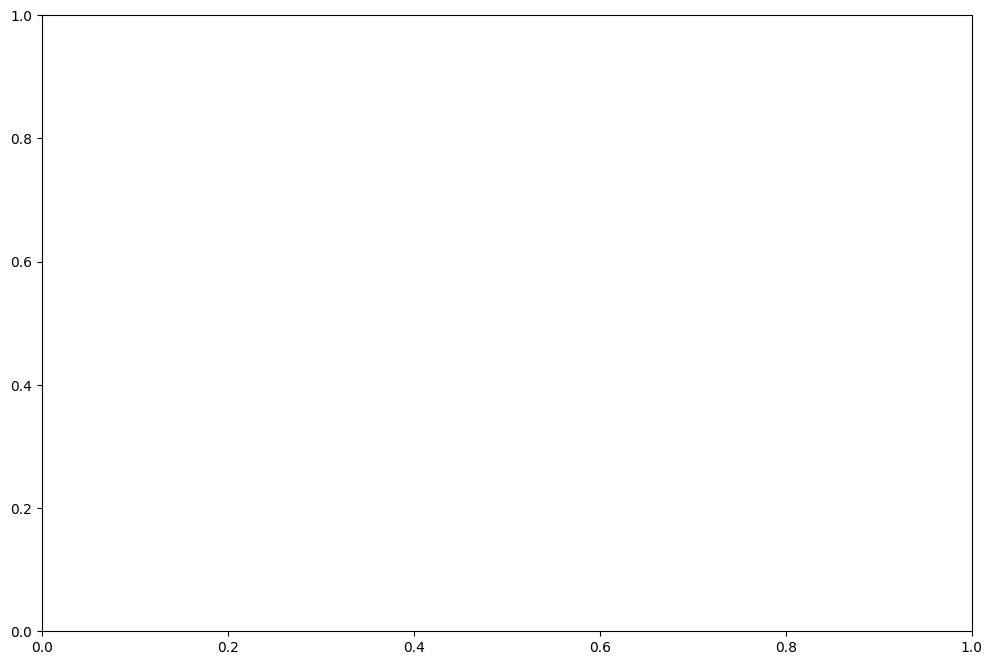

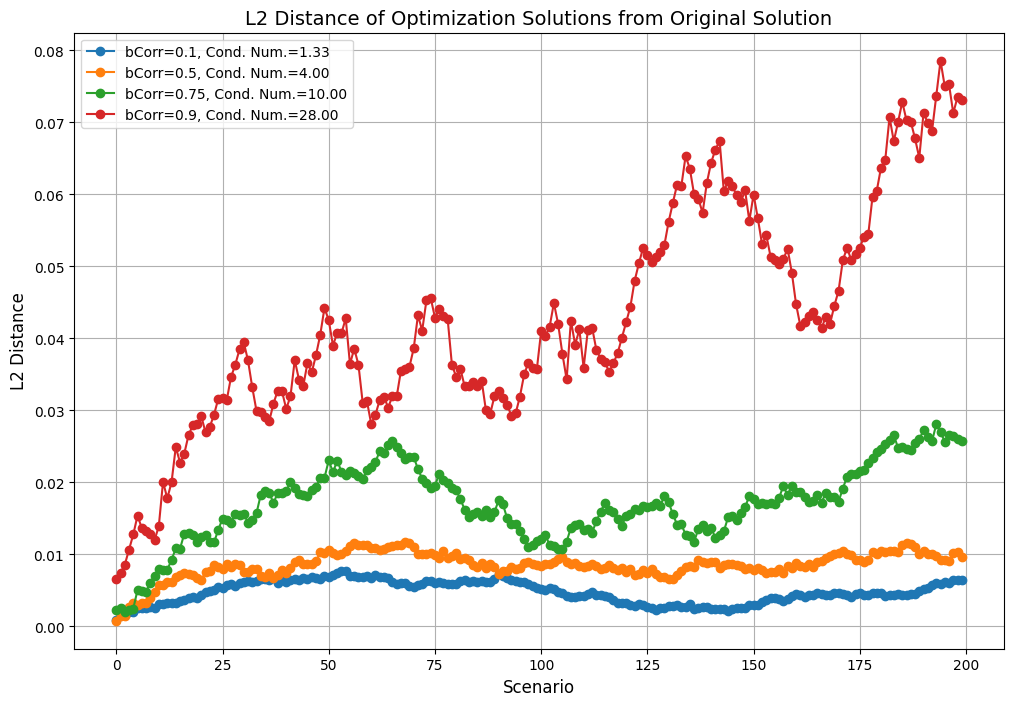

In [86]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import block_diag

# Function to create block covariance matrices
def formBlockMatrix(nBlocks, bSize, bCorr):
    block = np.ones((bSize, bSize)) * bCorr
    np.fill_diagonal(block, 1)  # Ensure diagonal is 1
    corr = block_diag(*([block] * nBlocks))
    return corr

# Optimization problem solver function
def solve_optimization(Cov):
    n = Cov.shape[0]
    Cov_symmetric = (Cov + Cov.T) / 2
    w = cp.Variable(n)
    objective = cp.Minimize(cp.quad_form(w, Cov_symmetric))
    constraints = [cp.sum(w) == 1, w >= -1, w <= 1]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    return w.value

np.random.seed(0)
nBlocks = 3
bSize = 3
bCorrs = [0.1, 0.5, 0.75, 0.9]  # Block correlations
num_scenarios = 200

# For plotting with specified figure size
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size here

for bCorr in bCorrs:
    Cov_original = formBlockMatrix(nBlocks, bSize, bCorr)
    # Calculate condition number
    eVal, _ = np.linalg.eigh(Cov_original)
    condition_number = max(eVal) / min(eVal)
    
    optimal_weights_original = solve_optimization(Cov_original)
    l2_distances = []
    
    Cov_contaminated = Cov_original.copy()
    for _ in range(num_scenarios):
        noise = np.random.normal(0.001, 0.001, size=Cov_original.shape)
        Cov_contaminated += noise
        Cov_contaminated_symmetric = (Cov_contaminated + Cov_contaminated.T) / 2
        
        optimal_weights_contaminated = solve_optimization(Cov_contaminated_symmetric)
        l2_distance = np.linalg.norm(optimal_weights_original - optimal_weights_contaminated)
        l2_distances.append(l2_distance)
    
    # Plot with condition number in the legend
    label = f'bCorr={bCorr}, Cond. Num.={condition_number:.2f}'
    ax.plot(l2_distances, marker='o', linestyle='-', label=label)

ax.set_title('L2 Distance of Optimization Solutions from Original Solution', fontsize=14)
ax.set_xlabel('Scenario', fontsize=12)
ax.set_ylabel('L2 Distance', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True)
plt.show()
